In [2]:
import numpy as np
from scipy.special import gamma as gammafnc
from scipy.special import hankel1, hankel2
import matplotlib.pyplot as plt

In [3]:
def cornerpoint(abs_lam):
    return np.power(np.power(float(2), 1-2*abs_lam)*np.pi/np.power(gammafnc(abs_lam), 2), 1/(1-2*abs_lam))

def H_squared(z, abs_lam):
    return np.real(hankel1(abs_lam, z)*hankel2(abs_lam, z))

In [4]:
lam_array = np.linspace(start=0, stop=10, num=1000)

acceptance_probability = []
for lam in lam_array:
    abs_lam = np.abs(lam)

    if (abs_lam >= 0.5):
        acceptance_probability.append(2 / (np.pi*cornerpoint(abs_lam)*H_squared(cornerpoint(abs_lam), abs_lam)))
    else:
        acceptance_probability.append((np.pi*cornerpoint(abs_lam)*H_squared(cornerpoint(abs_lam), abs_lam)) / 2)

acceptance_probability = np.array(acceptance_probability)

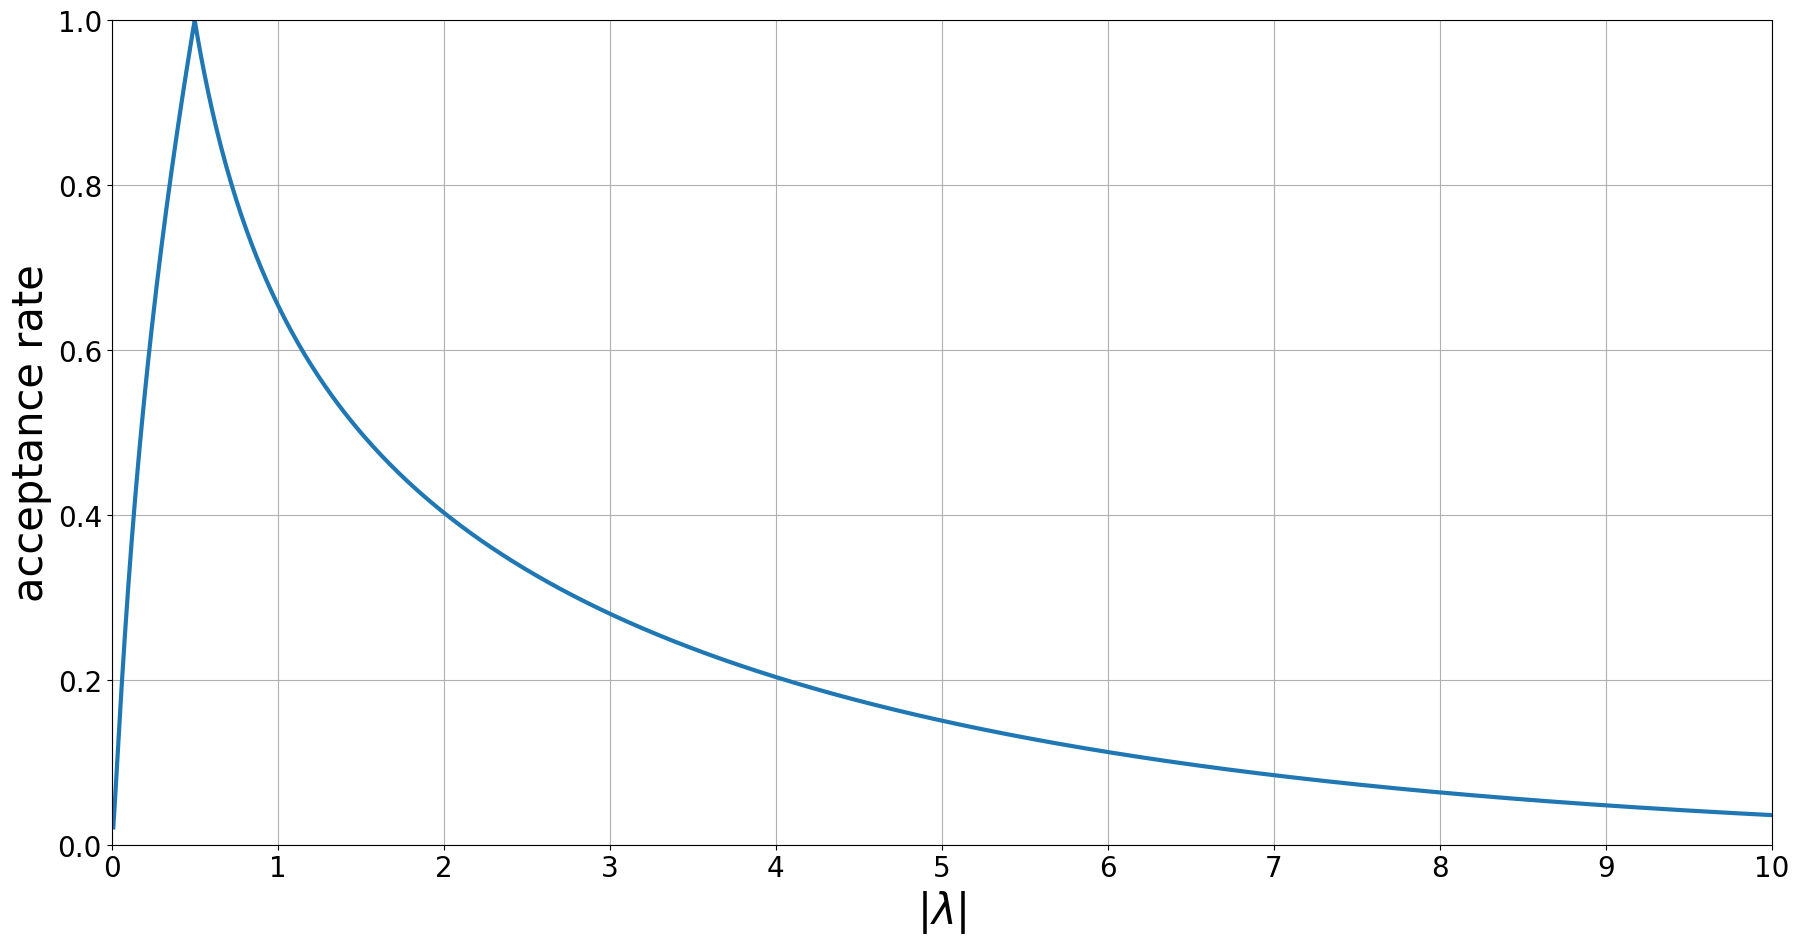

In [9]:
fig, ax = plt.subplots(figsize=(21.42, 10.71))
ax.plot(lam_array, acceptance_probability, label='acceptance prob.', lw=3)

#ax.axvline(x=0.5, ymin=0, ymax=1, ls='--')
ax.set_ylabel(r'acceptance rate', fontsize=30)
ax.set_xlabel(r'$|\lambda|$', fontsize=30)

ax.set_xlim(0, 10)
ax.set_ylim(0, 1)

ax.set_xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)

plt.savefig('acceptance_rates/squeezed_acceptance_rates.jpg', dpi=200)
plt.show()